In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

import utils
import importlib
importlib.reload(utils)

<module 'utils' from '/Users/chooenming/Desktop/Capstone Project/To_Git/utils.py'>

In [12]:
FILEPATH = "/Users/chooenming/Desktop/Capstone Project/To_Git/Data/Suicide_Detection.csv"
data = utils.read_data(FILEPATH)

   Unnamed: 0                                               text        class
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide
1           3  Am I weird I don't get affected by compliments...  non-suicide
2           4  Finally 2020 is almost over... So I can never ...  non-suicide
3           8          i need helpjust help me im crying so hard      suicide
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide


In [21]:
data["cleaned_text"] = data["text"].apply(utils.preprocess_text)

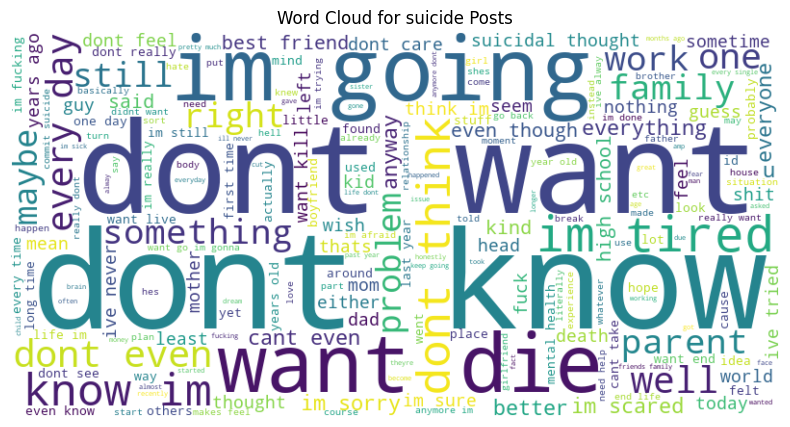

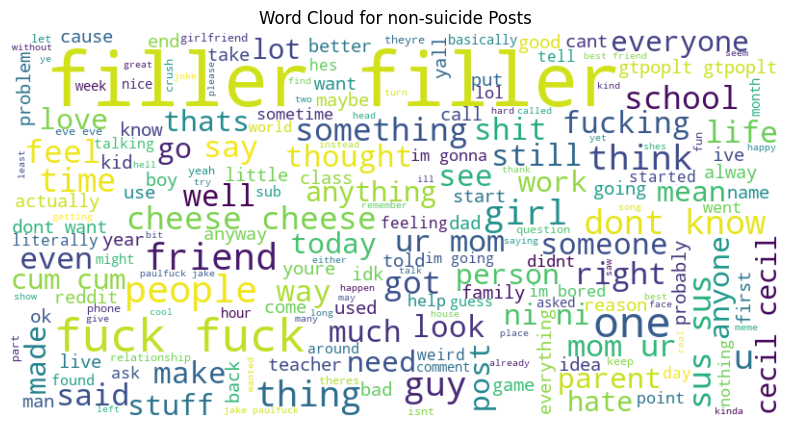

In [23]:
for label in data["class"].unique():
    text = ' '.join(data[data["class"] == label]["cleaned_text"])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label} Posts')
    plt.axis('off')
    plt.show()

In [25]:
data["post_length"] = data["cleaned_text"].apply(lambda x: len(x.split()))
print(data.head())

   Unnamed: 0                                               text        class  \
0           2  Ex Wife Threatening SuicideRecently I left my ...      suicide   
1           3  Am I weird I don't get affected by compliments...  non-suicide   
2           4  Finally 2020 is almost over... So I can never ...  non-suicide   
3           8          i need helpjust help me im crying so hard      suicide   
4           9  I’m so lostHello, my name is Adam (16) and I’v...      suicide   

                                        cleaned_text  post_length  
0  ex wife threatening suiciderecently left wife ...           64  
1  weird dont get affected compliments coming som...           14  
2  finally almost never hear bad year ever swear ...           11  
3                  need helpjust help im crying hard            6  
4  im losthello name adam ive struggling years im...          223  


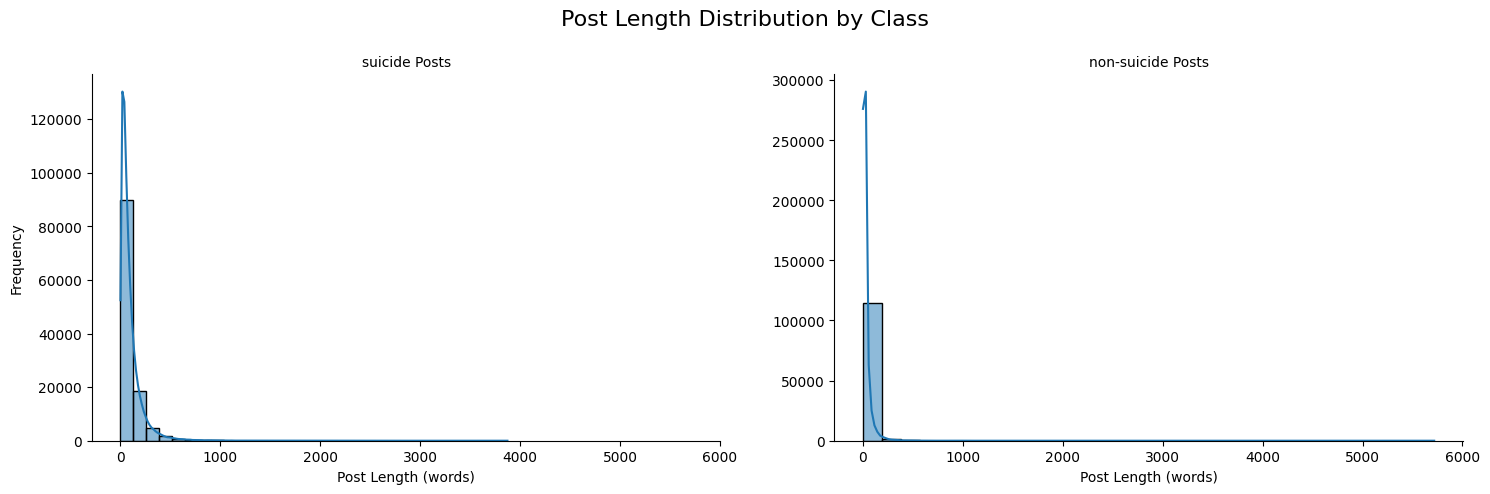

In [26]:
g = sns.FacetGrid(data, col="class", height=5, aspect=1.5, sharey=False)
g.map(sns.histplot, "post_length", kde=True, bins=30)
g.set_axis_labels("Post Length (words)", "Frequency")
g.set_titles(col_template="{col_name} Posts")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Post Length Distribution by Class', fontsize=16)
plt.show()

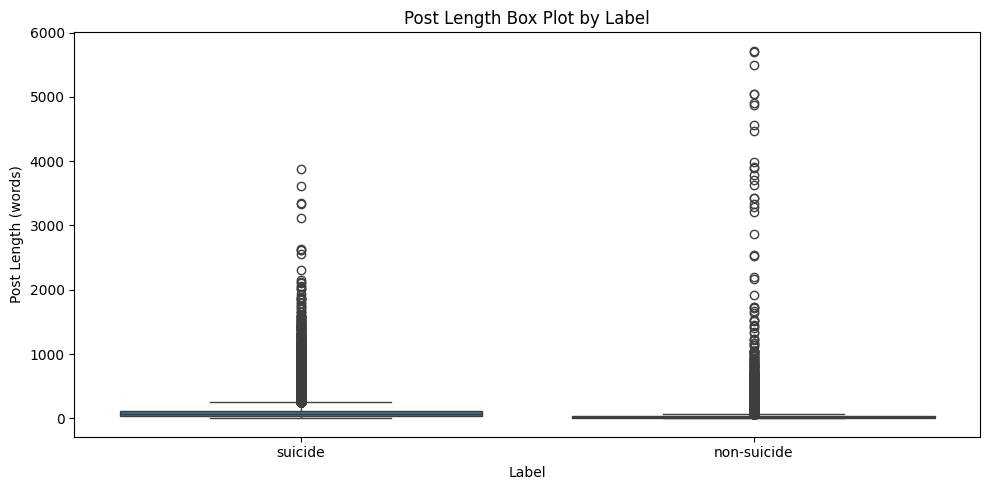

In [28]:
plt.figure(figsize=(10, 5))

sns.boxplot(data=data, x="class", y="post_length")
plt.title("Post Length Box Plot by Label")
plt.xlabel("Label")
plt.ylabel("Post Length (words)")

plt.tight_layout()
plt.show()